#  Sales & Profit Analysis Report
**Dataset:** Superstore  "https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls"

**Prepared by:** Ali Abdelhamid  
**Date:** 2025-06-28


##  Project Objective


### This project aims to explore and analyze the sales dataset to uncover patterns and relationships between key variables such as:
- **Discounts**
- **Profit**
- **Product Categories**
- **Regions**

By identifying:
- Underperforming products  
- Loss-making strategies (e.g., excessive discounting)  
- High-performing customer segments  
we seek to provide **actionable insights** that can help:
- Improve overall profitability  
- Optimize sales and marketing strategies  
- Support data-driven business decisions


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('Sample - Superstore.csv',encoding='windows-1252')

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
df.iloc[:, -4:].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [17]:
df_cate = df[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]

In [18]:
df_cate.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


# Dataset Dimensions Overview

In [23]:
for value in df_cate.columns:
    print(f"{value}: {df[value].nunique()}")

Ship Mode: 4
Customer ID: 793
Customer Name: 793
Segment: 3
Country: 1
City: 531
State: 49
Region: 4
Product ID: 1862
Category: 3
Sub-Category: 17
Product Name: 1850


In [25]:
df['Order Date'].nunique()

1237

In [27]:
df['Ship Date'].nunique()

1334

In [29]:
df.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [31]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

# Total Sales & Profit

In [34]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"💵 Total Profit: ${total_profit:,.2f}")

💰 Total Sales: $2,297,200.86
💵 Total Profit: $286,397.02


##  Profit Margin

In [37]:
profit_margin = total_profit / total_sales
print(f"📊 Profit Margin: {profit_margin:.2%}")

📊 Profit Margin: 12.47%


# Correlation between Sales and Profit

In [40]:
correlation = df[['Sales', 'Profit']].corr().iloc[0, 1]
print(f"📈 Correlation between Sales and Profit: {correlation:.2f}")


📈 Correlation between Sales and Profit: 0.48


## Yearly Sales and Profit


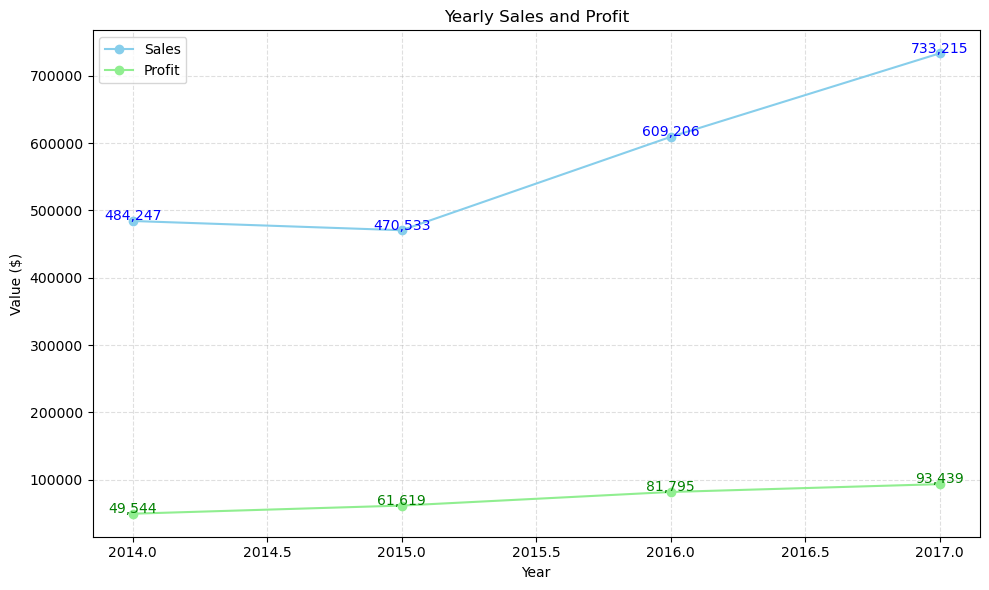

In [43]:
# تأكد إن Order Date بصيغة datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# استخراج السنة
df['Year'] = df['Order Date'].dt.year

# تلخيص المبيعات والربح حسب السنة
yearly_summary = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# رسم البيانات
plt.figure(figsize=(10, 6))
plt.plot(yearly_summary['Year'], yearly_summary['Sales'], marker='o', label='Sales', color='skyblue')
plt.plot(yearly_summary['Year'], yearly_summary['Profit'], marker='o', label='Profit', color='lightgreen')

# إضافة القيم على النقاط
for i in range(len(yearly_summary)):
    plt.text(yearly_summary['Year'][i], yearly_summary['Sales'][i]+1000, f"{yearly_summary['Sales'][i]:,.0f}", ha='center', color='blue')
    plt.text(yearly_summary['Year'][i], yearly_summary['Profit'][i]+1000, f"{yearly_summary['Profit'][i]:,.0f}", ha='center', color='green')

# تنسيق الرسم
plt.title("Yearly Sales and Profit")
plt.xlabel("Year")
plt.ylabel("Value ($)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## Monthly Sales Comparison – Last 2 Years

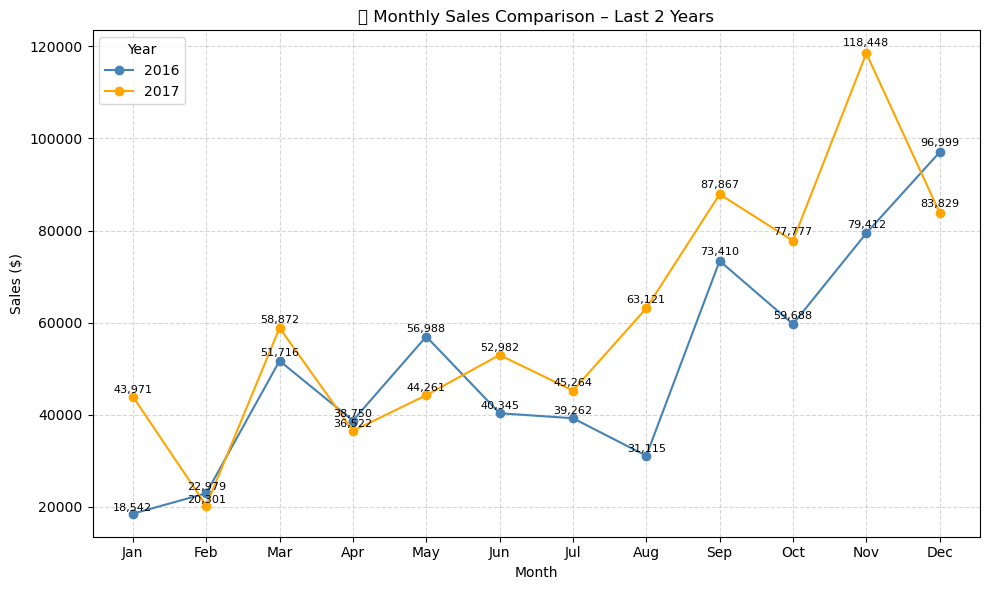

In [47]:
import calendar
# 1. تحويل التاريخ لو مش متحول قبل كده
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. استخراج السنة والشهر
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# 3. تحديد آخر سنتين فقط
latest_years = sorted(df['Year'].unique())[-2:]
df_recent = df[df['Year'].isin(latest_years)]

# 4. تجميع المبيعات شهريًا لكل سنة
monthly_sales = df_recent.groupby(['Year', 'Month'])['Sales'].sum().unstack(0)

# 5. رسم البيانات مع التسميات
ax = monthly_sales.plot(kind='line', marker='o', figsize=(10, 6), color=['steelblue', 'orange'])
plt.title('📈 Monthly Sales Comparison – Last 2 Years')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:])  # عرض أسماء الشهور
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year')
plt.tight_layout()

# 6. إضافة التسميات
for year in monthly_sales.columns:
    for month in monthly_sales.index:
        value = monthly_sales.loc[month, year]
        if not pd.isna(value):
            plt.text(month, value + value * 0.01, f"{value:,.0f}",
                     ha='center', va='bottom', fontsize=8, color='black')

plt.show()


## Monthly Profit Comparison – Last 2 Years

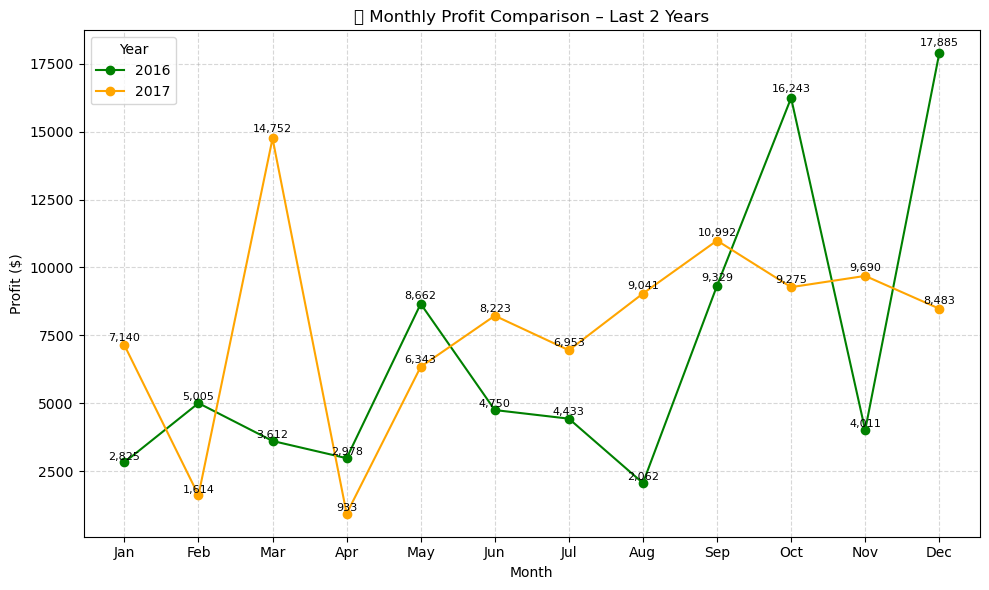

In [51]:
import calendar

# تحويل التاريخ (لو مش متحول بالفعل)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# استخراج السنة والشهر
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# تحديد آخر سنتين
latest_years = sorted(df['Year'].unique())[-2:]
df_recent = df[df['Year'].isin(latest_years)]

# حساب إجمالي الربح شهريًا لكل سنة
monthly_profit = df_recent.groupby(['Year', 'Month'])['Profit'].sum().unstack(0)

# رسم الخطوط
ax = monthly_profit.plot(kind='line', marker='o', figsize=(10, 6), color=['green', 'orange'])
plt.title('💰 Monthly Profit Comparison – Last 2 Years')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year')
plt.tight_layout()

# إضافة التسميات لكل نقطة
for year in monthly_profit.columns:
    for month in monthly_profit.index:
        value = monthly_profit.loc[month, year]
        if not pd.isna(value):
            plt.text(month, value + value * 0.01, f"{value:,.0f}", 
                     ha='center', va='bottom', fontsize=8, color='black')

plt.show()


# Correlation between Sales and Profit By Region

In [55]:
regions = df['Region'].unique()

print("📊 Correlation between Sales and Profit by Region:\n")
for region in regions:
    subset = df[df['Region'] == region]
    correlation = subset['Sales'].corr(subset['Profit'])
    print(f"- {region}: {correlation:.2f}")


📊 Correlation between Sales and Profit by Region:

- South: 0.01
- West: 0.65
- Central: 0.64
- East: 0.52


## What Does This Mean?

West & Central: Excellent areas — the more you sell, the more you earn.

East: Needs monitoring — the relationship exists but isn’t ideal.

South: Sales without profit — the issue here could be due to:

    High discounts

    Loss-making products

    High shipping or fulfillment costs

    Weak pricing strategy

# Correlation between Discount and Profit by SouthRegion

In [59]:
south_df = df[df['Region'] == 'South']
correlation = south_df['Discount'].corr(south_df['Profit'])
print(f"📉 Correlation between Discount and Profit in South: {correlation:.2f}")


📉 Correlation between Discount and Profit in South: -0.27


In [61]:
# تصفية الداتا على فئة Furniture فقط
furniture_df = df[df['Category'] == 'Furniture']

# إنشاء قائمة بالمناطق
regions = furniture_df['Region'].unique()

# حساب معامل الارتباط لكل منطقة
print("📊 Correlation between Discount and Profit for Furniture by Region:\n")
for region in regions:
    region_df = furniture_df[furniture_df['Region'] == region]
    
    # التأكد من وجود بيانات كافية
    if len(region_df) > 1:
        corr = region_df['Discount'].corr(region_df['Profit'])
        print(f"- {region}: {corr:.2f}")
    else:
        print(f"- {region}: Not enough data")


📊 Correlation between Discount and Profit for Furniture by Region:

- South: -0.56
- West: -0.54
- East: -0.53
- Central: -0.48


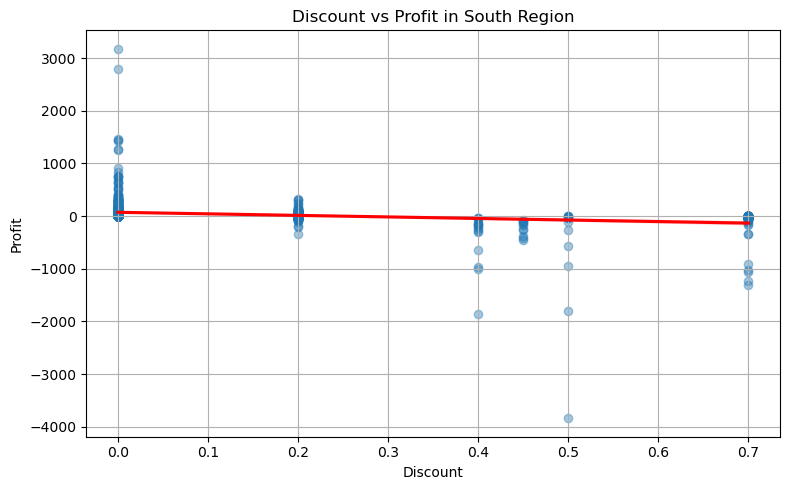

In [63]:

plt.figure(figsize=(8, 5))
sns.regplot(data=south_df, x='Discount', y='Profit', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title('Discount vs Profit in South Region')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


### Clear Negative Impact: The More You Discount, The More Profit Declines

In [66]:
categories = south_df['Category'].unique()

for cat in categories:
    sub_df = south_df[south_df['Category'] == cat]
    corr = sub_df['Discount'].corr(sub_df['Profit'])
    print(f"- {cat}: {corr:.2f}")


- Furniture: -0.56
- Office Supplies: -0.24
- Technology: -0.38


# Correlation between Discount and Profit for Furniture by Region

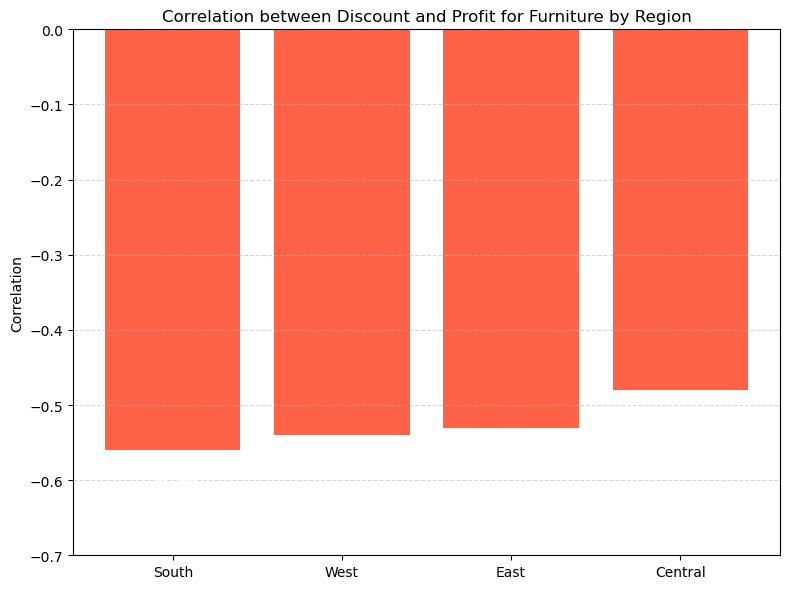

In [69]:
# بيانات معامل الارتباط بين Discount و Profit في فئة Furniture حسب Region
regions = ['South', 'West', 'East', 'Central']
correlations = [-0.56, -0.54, -0.53, -0.48]

# رسم مخطط الأعمدة
plt.figure(figsize=(8, 6))
bars = plt.bar(regions, correlations, color='tomato')

# إضافة تسميات على كل عمود
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.03, f"{height:.2f}", 
             ha='center', va='top', color='white', fontsize=12, fontweight='bold')

# تنسيقات
plt.title('Correlation between Discount and Profit for Furniture by Region')
plt.ylabel('Correlation')
plt.ylim(-0.7, 0)  # تحديد الحد الأدنى لضمان وضوح البيانات
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## General Interpretation:

   ### Discounts in the Furniture category negatively impact profits across all regions.

   ### The strongest correlation was observed in the Central (though differences were minimal).

   ### Final Conclusion: Furniture products suffer from discounts regardless of the region.

In [72]:
# تصفية البيانات على فئة Furniture
furniture_df = df[df['Category'] == 'Furniture']

# حساب إجمالي الربح في Central و South
profit_by_region = furniture_df.groupby('Region')['Profit'].sum()

# طباعة النتائج
central_profit = profit_by_region.get('Central', 0)
south_profit = profit_by_region.get('South', 0)

print(f"🟢 Central Region Profit (Furniture): ${central_profit:,.2f}")
print(f"🔴 South Region Profit (Furniture):   ${south_profit:,.2f}")


🟢 Central Region Profit (Furniture): $-2,871.05
🔴 South Region Profit (Furniture):   $6,771.21


In [74]:
furniture_df = df[df['Category'] == 'Furniture']

In [76]:
regions = furniture_df['Region'].unique()

print("📉 Correlation between Discount and Profit for Furniture by Region:\n")
for region in regions:
    region_df = furniture_df[furniture_df['Region'] == region]
    corr = region_df['Discount'].corr(region_df['Profit'])
    print(f"- {region}: {corr:.2f}")
##🔹 2. تحليل الارتباط لكل Region داخل Furniture

📉 Correlation between Discount and Profit for Furniture by Region:

- South: -0.56
- West: -0.54
- East: -0.53
- Central: -0.48


In [78]:
correlation = df['Discount'].corr(df['Profit'])
print(f"📉 Correlation between Discount and Profit: {correlation:.2f}")


📉 Correlation between Discount and Profit: -0.22


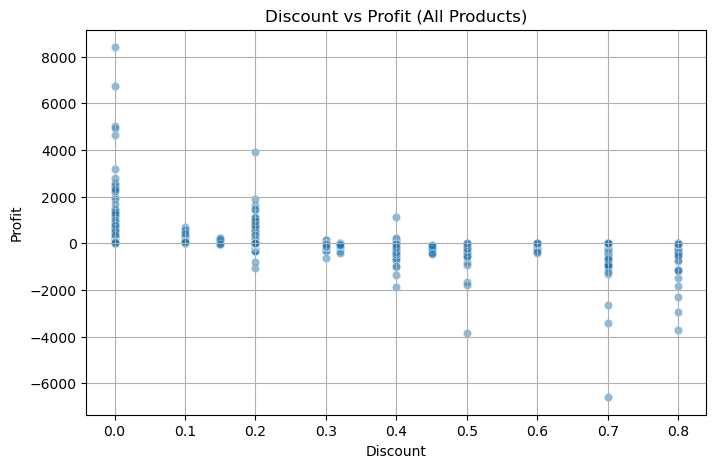

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# فلترة الأعمدة المطلوبة
df_discount_profit = df[['Discount', 'Profit']]

# رسم العلاقة
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_discount_profit, x='Discount', y='Profit', alpha=0.5)
plt.title('Discount vs Profit (All Products)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


## What Does This Mean?

Inverse Relationship:

    As discounts increase → Profit tends to decrease.

    However, the correlation is weak—not all cases follow this pattern.

Why?

    Some products are negatively affected, while others are not.

🔍 Why Might the Correlation Be Weak?

    You're analyzing all products together—some remain profitable even with discounts.

    Some products already have low margins, even without discounts.

    Discounts can be an effective promotional tool for certain categories.



# Analyze product loss  - Central

In [146]:
# فلترة البيانات على Office Supplies + Central + الربح السالب
loss_df = df[
    (df['Category'] == 'Office Supplies') &
    (df['Region'] == 'Central') &
    (df['Profit'] < 0)
]


In [148]:
top_losses = loss_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

print("🔻 Top 10 Loss-Making Products in Central - Office Supplies:")
print(top_losses)


🔻 Top 10 Loss-Making Products in Central - Office Supplies:
Product Name
GBC DocuBind P400 Electric Binding System                                     -5552.8392
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Ibico EPK-21 Electric Binding System                                          -2929.4845
Ibico Hi-Tech Manual Binding System                                           -1601.1975
GBC DocuBind TL300 Electric Binding System                                    -1480.0335
3.6 Cubic Foot Counter Height Office Refrigerator                             -1378.8216
Hoover Upright Vacuum With Dirt Cup                                           -1181.2824
GBC ProClick 150 Presentation Binding System                                  -1147.0074
GBC Ibimaster 500 Manual ProClick Binding System                              -1141.4700
High Speed Automatic Electric Letter Opener                                    -786.0144
Name: Profit, dtype: float64


In [141]:
# فلترة البيانات على Technology + Central + الربح السالب
loss_df = df[
    (df['Category'] == 'Technology') &
    (df['Region'] == 'Central') &
    (df['Profit'] < 0)
]


In [143]:
top_losses = loss_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

print("🔻 Top 10 Loss-Making Products in Central - Technology:")
print(top_losses)


🔻 Top 10 Loss-Making Products in Central - Technology:
Product Name
Lexmark MX611dhe Monochrome Laser Printer                     -1869.9890
StarTech.com 10/100 VDSL2 Ethernet Extender Kit                -279.6780
Bady BDG101FRU Card Printer                                    -263.9967
Xerox WorkCentre 6505DN Laser Multifunction Printer            -251.9958
Epson TM-T88V Direct Thermal Printer - Monochrome - Desktop    -121.2705
Okidata C331dn Printer                                          -97.7200
Jawbone MINI JAMBOX Wireless Bluetooth Speaker                  -87.6672
WD My Passport Ultra 2TB Portable External Hard Drive           -33.3200
Microsoft Natural Keyboard Elite                                -29.9400
V7 USB Numeric Keypad                                           -27.2922
Name: Profit, dtype: float64


In [84]:
# فلترة البيانات على Furniture + Central + الربح السالب
loss_df = df[
    (df['Category'] == 'Furniture') &
    (df['Region'] == 'Central') &
    (df['Profit'] < 0)
]


In [86]:
top_losses = loss_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

print("🔻 Top 10 Loss-Making Products in Central - Furniture:")
print(top_losses)


🔻 Top 10 Loss-Making Products in Central - Furniture:
Product Name
Tenex Chairmat w/ Average Lip, 45" x 53"                            -681.1200
Bevis Oval Conference Table, Walnut                                 -600.2540
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -566.5625
O'Sullivan Plantations 2-Door Library in Landvery Oak               -546.6656
Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables    -538.4460
O'Sullivan Living Dimensions 5-Shelf Bookcases                      -534.7716
Hon Rectangular Conference Tables                                   -525.6405
HON 5400 Series Task Chairs for Big and Tall                        -490.6860
Tenex Antistatic Computer Chair Mats                                -427.4500
Deflect-o RollaMat Studded, Beveled Mat for Medium Pile Carpeting   -426.1026
Name: Profit, dtype: float64


In [152]:
# متوسط الخصم لكل منتج خاسر
avg_discount = loss_df.groupby('Product Name')['Discount'].mean()

# دمج الخصم مع قائمة الخسارة
loss_detail = pd.DataFrame(top_losses).merge(avg_discount, left_index=True, right_index=True)
loss_detail.columns = ['Total Loss', 'Average Discount']

print("📉 Losses and Average Discounts for Top Losing Products:")
print(loss_detail)


📉 Losses and Average Discounts for Top Losing Products:
                                                    Total Loss  \
Product Name                                                     
GBC DocuBind P400 Electric Binding System           -5552.8392   
Fellowes PB500 Electric Punch Plastic Comb Bind...  -3431.6730   
Ibico EPK-21 Electric Binding System                -2929.4845   
Ibico Hi-Tech Manual Binding System                 -1601.1975   
GBC DocuBind TL300 Electric Binding System          -1480.0335   
3.6 Cubic Foot Counter Height Office Refrigerator   -1378.8216   
Hoover Upright Vacuum With Dirt Cup                 -1181.2824   
GBC ProClick 150 Presentation Binding System        -1147.0074   
GBC Ibimaster 500 Manual ProClick Binding System    -1141.4700   
High Speed Automatic Electric Letter Opener          -786.0144   

                                                    Average Discount  
Product Name                                                          
GBC DocuB

كل المنتجات الخاسرة كانت بخصومات عالية (50% أو أكثر في بعض الحالات).

المنتج الأول مثلاً بـ خصم 60% وحقق خسارة كبيرة -681 دولار.

خصومات زي دي غالبًا أكبر من هامش الربح الحقيقي.

In [91]:
# تحليل متوسط الكمية المباعة
avg_quantity = loss_df.groupby('Product Name')['Quantity'].mean()
loss_detail = loss_detail.merge(avg_quantity, left_index=True, right_index=True)
loss_detail.columns = ['Total Loss', 'Average Discount', 'Average Quantity']

print(loss_detail)


                                                    Total Loss  \
Product Name                                                     
Tenex Chairmat w/ Average Lip, 45" x 53"             -681.1200   
Bevis Oval Conference Table, Walnut                  -600.2540   
BoxOffice By Design Rectangular and Half-Moon M...   -566.5625   
O'Sullivan Plantations 2-Door Library in Landve...   -546.6656   
Bretford “Just In Time” Height-Adjustable Multi...   -538.4460   
O'Sullivan Living Dimensions 5-Shelf Bookcases       -534.7716   
Hon Rectangular Conference Tables                    -525.6405   
HON 5400 Series Task Chairs for Big and Tall         -490.6860   
Tenex Antistatic Computer Chair Mats                 -427.4500   
Deflect-o RollaMat Studded, Beveled Mat for Med...   -426.1026   

                                                    Average Discount  \
Product Name                                                           
Tenex Chairmat w/ Average Lip, 45" x 53"                       

الخصم الكبير مع كمية متوسطة أو عالية = خسارة مؤكدة.

🔁 بيع المنتجات بكميات جيدة لم يمنع الخسائر → لأن الخصم بيأكل الربح كله.

❌ بعض المنتجات مثل:

    Tenex Chairmat (خصم 60% وخسارة كبيرة)

    BoxOffice Tables و HON Chairs (خصم 50%)

# Loss-Making Products with High Discounts ALL Region


In [163]:
# فلترة فئة Office Supplies فقط
furniture_df = df[df['Category'] == 'Office Supplies']

# تجميع الربح حسب اسم المنتج
loss_products = furniture_df.groupby('Product Name')['Profit'].sum()

# استخراج المنتجات اللي إجمالي ربحها سلبي
loss_products = loss_products[loss_products < 0].sort_values().head(10)

# عرض النتائج
print("📉 المنتجات الخاسرة في فئة Office Supplies:")
print(loss_products)


📉 المنتجات الخاسرة في فئة Office Supplies:
Product Name
GBC DocuBind P400 Electric Binding System            -1878.1662
Martin Yale Chadless Opener Electric Letter Opener   -1299.1836
3.6 Cubic Foot Counter Height Office Refrigerator     -872.0752
Tennsco Single-Tier Lockers                           -825.7480
SAFCO Commercial Wire Shelving, Black                 -635.4440
SAFCO Boltless Steel Shelving                         -470.4696
GBC ProClick 150 Presentation Binding System          -461.3308
Premier Automatic Letter Opener                       -427.8586
GBC VeloBinder Electric Binding Machine               -411.3320
Fellowes Officeware Wire Shelving                     -332.3710
Name: Profit, dtype: float64


In [160]:
# فلترة فئة Technology فقط
furniture_df = df[df['Category'] == 'Technology']

# تجميع الربح حسب اسم المنتج
loss_products = furniture_df.groupby('Product Name')['Profit'].sum()

# استخراج المنتجات اللي إجمالي ربحها سلبي
loss_products = loss_products[loss_products < 0].sort_values().head(10)

# عرض النتائج
print("📉 المنتجات الخاسرة في فئة Technology:")
print(loss_products)


📉 المنتجات الخاسرة في فئة Technology:
Product Name
Cubify CubeX 3D Printer Double Head Print                     -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                     -4589.9730
Cubify CubeX 3D Printer Triple Head Print                     -3839.9904
Cisco TelePresence System EX90 Videoconferencing Unit         -1811.0784
Epson TM-T88V Direct Thermal Printer - Monochrome - Desktop   -1057.2300
Zebra GK420t Direct Thermal/Thermal Transfer Printer           -938.2800
StarTech.com 10/100 VDSL2 Ethernet Extender Kit                -785.7620
Lexmark MarkNet N8150 Wireless Print Server                    -506.4570
3D Systems Cube Printer, 2nd Generation, White                 -467.9964
Swingline SM12-08 MicroCut Jam Free Shredder                   -447.9888
Name: Profit, dtype: float64


In [158]:
# فلترة فئة Furniture فقط
furniture_df = df[df['Category'] == 'Furniture']

# تجميع الربح حسب اسم المنتج
loss_products = furniture_df.groupby('Product Name')['Profit'].sum()

# استخراج المنتجات اللي إجمالي ربحها سلبي
loss_products = loss_products[loss_products < 0].sort_values().head(10)

# عرض النتائج
print("📉 المنتجات الخاسرة في فئة Furniture:")
print(loss_products)


📉 المنتجات الخاسرة في فئة Furniture:
Product Name
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
Balt Solid Wood Round Tables                                                   -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables              -1148.4375
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer   -1147.4000
Hon 2090 “Pillow Soft” Series Mid Back Swivel/Tilt Chairs                       -989.0496
O'Sullivan 4-Shelf Bookcase in Odessa Pine                                      -975.0988
Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables                -964.1940
Bevis Oval Conference Table, Walnut                                             -856.0144
BPI Conference Tables                                                           -795.9725
Name: Profit, dtype: float64


In [97]:
# منتجات الأثاث فقط
furniture_df = df[df['Category'] == 'Furniture']

# فلترة المنتجات اللي عليها خصم أكبر من 40%
high_discount_df = furniture_df[furniture_df['Discount'] > 0.4]

# تجميع عدد مرات بيع كل منتج بهذه الخصومات
high_discount_counts = high_discount_df['Product Name'].value_counts().head(10)

# عرض أعلى المنتجات اللي اتعمل عليها خصومات كبيرة
print("🔻 المنتجات اللي عليها خصومات عالية (> 40%):")
print(high_discount_counts)


🔻 المنتجات اللي عليها خصومات عالية (> 40%):
Product Name
Flat Face Poster Frame                                               5
Staple-based wall hangings                                           5
O'Sullivan 4-Shelf Bookcase in Odessa Pine                           4
Bevis Rectangular Conference Tables                                  3
Eldon Expressions Wood Desk Accessories, Oak                         3
Dana Swing-Arm Lamps                                                 3
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables    3
KI Adjustable-Height Table                                           3
Bestar Classic Bookcase                                              3
12-1/2 Diameter Round Wall Clock                                     3
Name: count, dtype: int64


In [99]:
# المنتجات اللي عليها خصم عالي
high_discount_names = high_discount_df['Product Name'].unique()

# تقاطع مع المنتجات الخاسرة
loss_with_high_discount = loss_products[loss_products.index.isin(high_discount_names)].head(10)

print(" المنتجات الخاسرة اللي كان عليها خصومات عالية:")
print(loss_with_high_discount)


 المنتجات الخاسرة اللي كان عليها خصومات عالية:
Product Name
Bush Advantage Collection Racetrack Conference Table                -1934.3976
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
O'Sullivan 4-Shelf Bookcase in Odessa Pine                           -975.0988
Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables     -964.1940
Bevis Oval Conference Table, Walnut                                  -856.0144
BPI Conference Tables                                                -795.9725
Name: Profit, dtype: float64


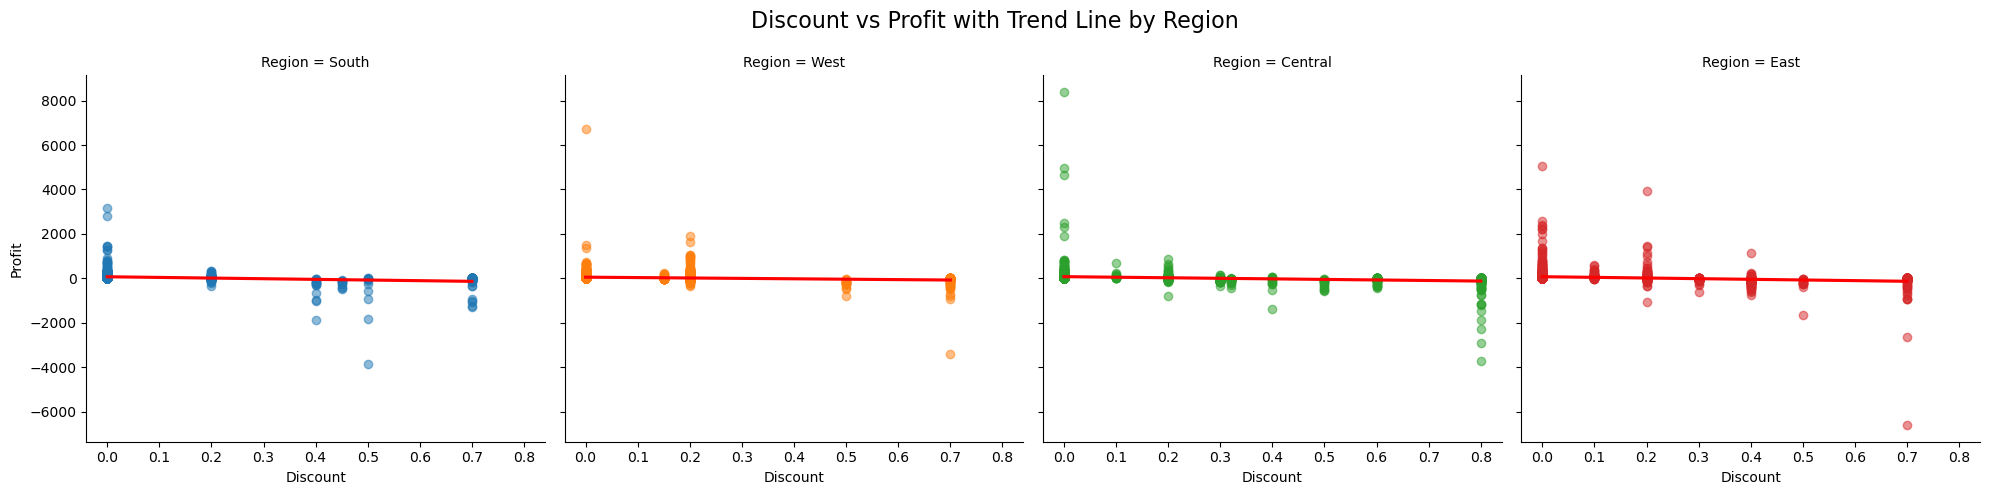

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم Scatter + خط الاتجاه لكل منطقة
sns.lmplot(
    data=df,
    x='Discount',
    y='Profit',
    col='Region',         # رسم رسم منفصل لكل Region
    hue='Region',         # تلوين حسب المنطقة
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Discount vs Profit with Trend Line by Region', fontsize=16)
plt.show()


### Conclusion:

    Furniture is the most negatively impacted category by discounts.

    Technology is also affected, but to a lesser extent (especially in the West & Central regions).

    Office Supplies shows minimal impact, with some regions almost unaffected.

Key Takeaways:

    Prioritize Furniture: Urgent need to revise discount strategies to protect margins.

    Tech & Office Supplies: More flexibility, but still require monitoring.

    Regional Variations: West/Central handle discounts better than South/East.

## TOP 10 REVENUE PRODUCT

In [105]:
product_sales = df.groupby('Product Name')[['Sales','Profit']].sum()


In [106]:
top5product_sales = product_sales.sort_values(by='Sales',ascending=False)


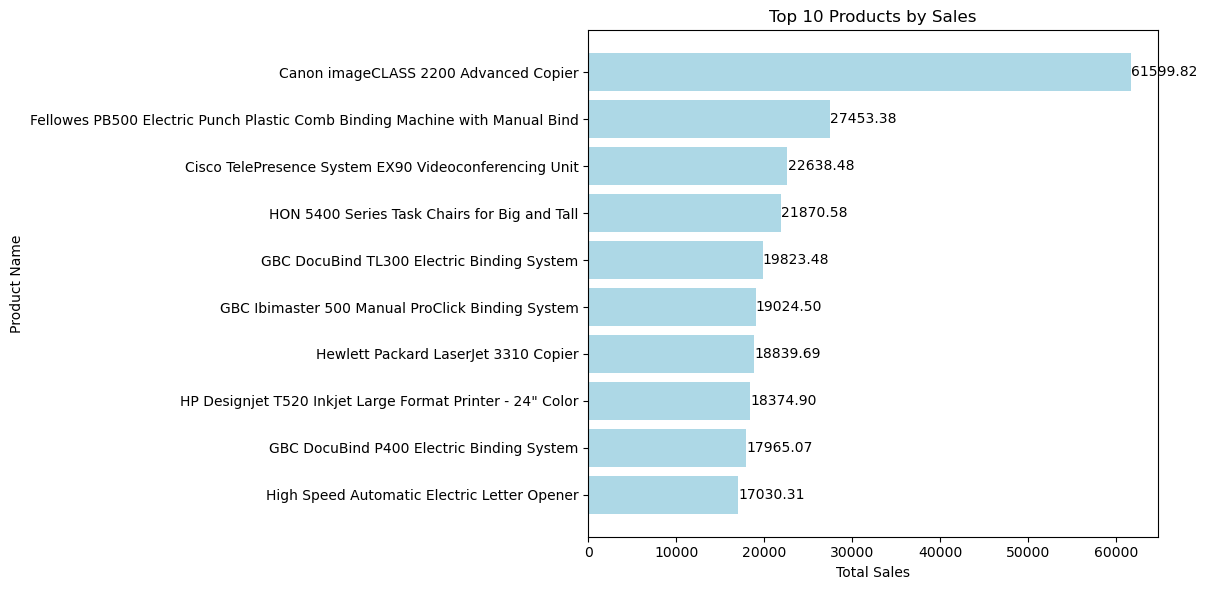

In [107]:
# تجميع وترتيب المبيعات
product_sales_df = df.groupby('Product Name', as_index=False)['Sales'].sum()
product_sales_df = product_sales_df.sort_values(by='Sales', ascending=False).head(10)

# رسم الشارت
plt.figure(figsize=(12, 6))
bars = plt.barh(product_sales_df['Product Name'], product_sales_df['Sales'], color='lightblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()  # أعلى قيمة في الأعلى

# إضافة البيانات على البارات
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


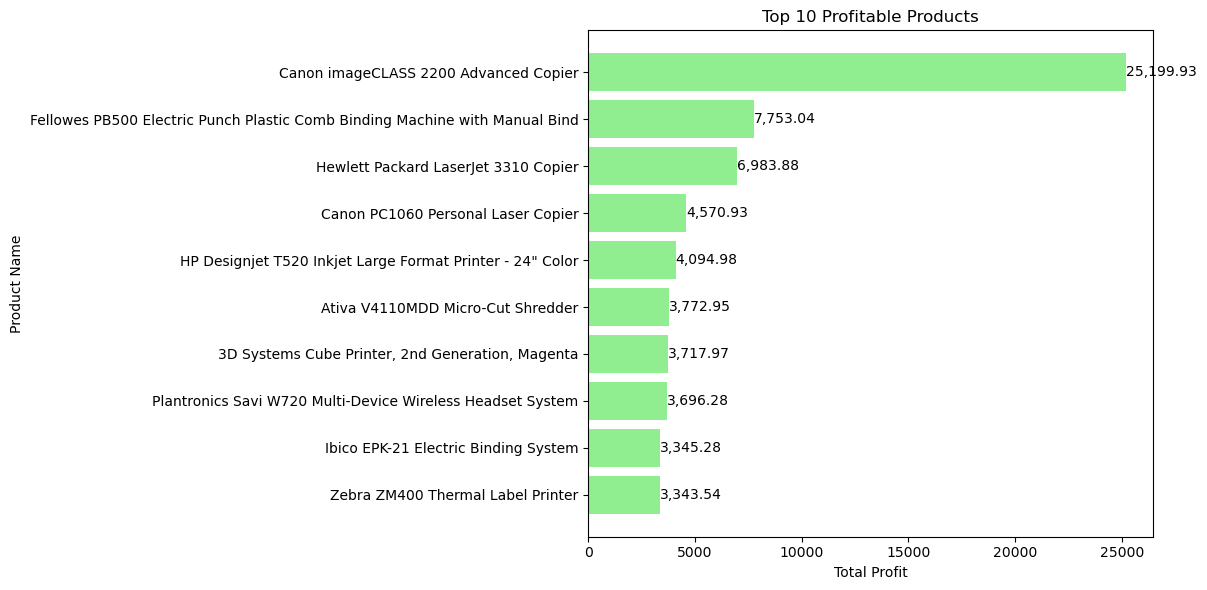

In [111]:
import matplotlib.pyplot as plt

# 1. حساب إجمالي الربح لكل منتج
product_profit = df.groupby('Product Name')['Profit'].sum()

# 2. استخراج أعلى 10 منتجات ربحًا
top_profit_products = product_profit.sort_values(ascending=False).head(10)

# 3. الرسم البياني
plt.figure(figsize=(12, 6))
bars = plt.barh(top_profit_products.index, top_profit_products.values, color='lightgreen')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.title('Top 10 Profitable Products')
plt.gca().invert_yaxis()  # أعلى منتج في الأعلى

# 4. إضافة القيم (Data Labels)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:,.2f}', va='center')

plt.tight_layout()
plt.show()


## Top 5 Cities by Sales and Profit

In [115]:
top_cities = df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(5)
print(top_cities)


                    Sales      Profit
City                                 
New York City  256368.161  62036.9837
Los Angeles    175851.341  30440.7579
Seattle        119540.742  29156.0967
San Francisco  112669.092  17507.3854
Philadelphia   109077.013 -13837.7674


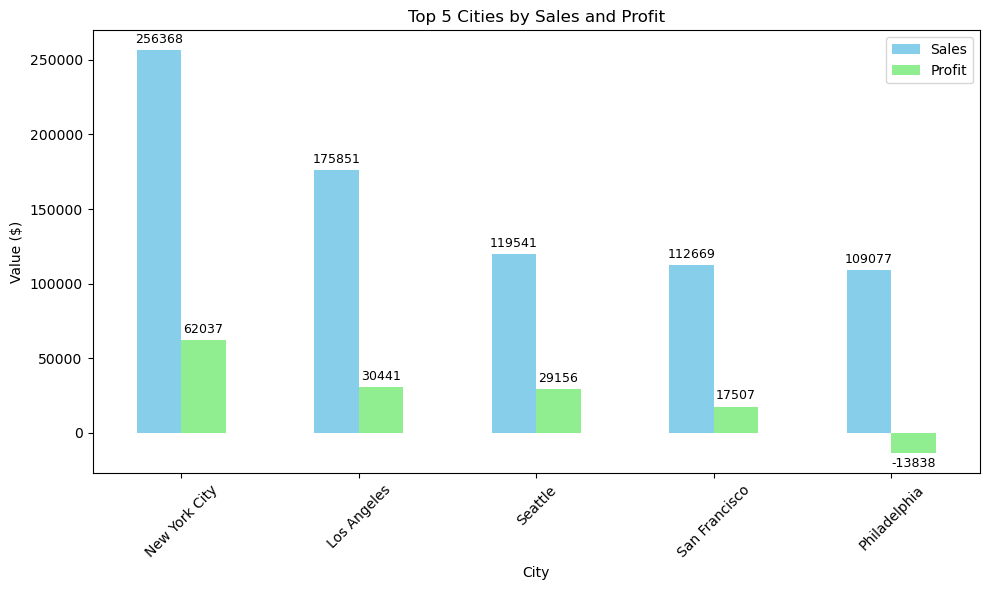

In [117]:
import matplotlib.pyplot as plt

# الرسم
ax = top_cities.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Top 5 Cities by Sales and Profit')
plt.xlabel('City')
plt.ylabel('Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()

#  إضافة القيم فوق كل عمود
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.show()


In [119]:
df[df['City'] == 'Philadelphia']['Discount'].describe()


count    537.000000
mean       0.326816
std        0.188344
min        0.200000
25%        0.200000
50%        0.200000
75%        0.400000
max        0.700000
Name: Discount, dtype: float64

In [121]:
philly_df = df[df['City'] == 'Philadelphia']
loss_products = philly_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print(loss_products)


Product Name
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish                  -1665.0522
Martin Yale Chadless Opener Electric Letter Opener                             -1199.2464
GBC Ibimaster 500 Manual ProClick Binding System                                -760.9800
Tennsco Single-Tier Lockers                                                     -675.6120
Okidata MB491 Multifunction Printer                                             -643.7100
HON 5400 Series Task Chairs for Big and Tall                                    -630.8820
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer    -619.5960
Fellowes PB200 Plastic Comb Binding Machine                                     -571.1664
StarTech.com 10/100 VDSL2 Ethernet Extender Kit                                 -559.3560
Lexmark MarkNet N8150 Wireless Print Server                                     -506.4570
Name: Profit, dtype: float64


In [123]:
philly_df = df[df['City'] == 'Philadelphia']
correlation = philly_df['Discount'].corr(philly_df['Profit'])
print(f"📉 Correlation between Discount and Profit in Philadelphia: {correlation:.2f}")


📉 Correlation between Discount and Profit in Philadelphia: -0.21


In [125]:
# نسبة كل فئة في فيلادلفيا
category_philly = df[df['City'] == 'Philadelphia']['Category'].value_counts(normalize=True) * 100

# نسبة كل فئة في باقي المدن
category_others = df[df['City'] != 'Philadelphia']['Category'].value_counts(normalize=True) * 100

# دمج النتائج في جدول واحد
comparison = pd.DataFrame({
    'Philadelphia %': category_philly,
    'Other Cities %': category_others
}).fillna(0).round(2)

print(comparison)


                 Philadelphia %  Other Cities %
Category                                       
Furniture                 20.67           21.25
Office Supplies           58.10           60.42
Technology                21.23           18.33


In [127]:
loss_by_product = philly_df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print(loss_by_product)


Product Name
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish                  -1665.0522
Martin Yale Chadless Opener Electric Letter Opener                             -1199.2464
GBC Ibimaster 500 Manual ProClick Binding System                                -760.9800
Tennsco Single-Tier Lockers                                                     -675.6120
Okidata MB491 Multifunction Printer                                             -643.7100
HON 5400 Series Task Chairs for Big and Tall                                    -630.8820
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer    -619.5960
Fellowes PB200 Plastic Comb Binding Machine                                     -571.1664
StarTech.com 10/100 VDSL2 Ethernet Extender Kit                                 -559.3560
Lexmark MarkNet N8150 Wireless Print Server                                     -506.4570
Name: Profit, dtype: float64


In [129]:
philly_df.groupby('Category')['Discount'].mean()


Category
Furniture          0.276577
Office Supplies    0.339423
Technology         0.341228
Name: Discount, dtype: float64

# loses products 

| **Furniture**       | 27.7%       | ✅ نعم              |
| **Technology**      | 34.1%       | ✅ نعم              |
| **Office Supplies** | 33.9%       | ✅ نعم              |


# Sales by Segment and Ship Mode

In [133]:
pivot_table = pd.pivot_table(
    df,
    values='Sales',
    index='Segment',
    columns='Ship Mode',
    aggfunc='sum'
)

print(pivot_table)


Ship Mode    First Class   Same Day  Second Class  Standard Class
Segment                                                          
Consumer     159168.9650  60596.359   231498.9496     710137.0714
Corporate    105858.4699  45121.323   146126.0388     409040.5351
Home Office   86400.9880  22645.443    81568.5810     239038.1365


## Analytical Notes:

    ✅ Standard Class is the most commonly used shipping method across all segments, especially among individual customers (Consumer).

    🔵 Consumer Segment has the highest usage for all shipping methods.

    🔴 Same Day Shipping is the least used method — logical, as it’s typically the most expensive.

    🟢 Corporate and Home Office segments tend to prefer Second Class and Standard Class over First or Same Day.

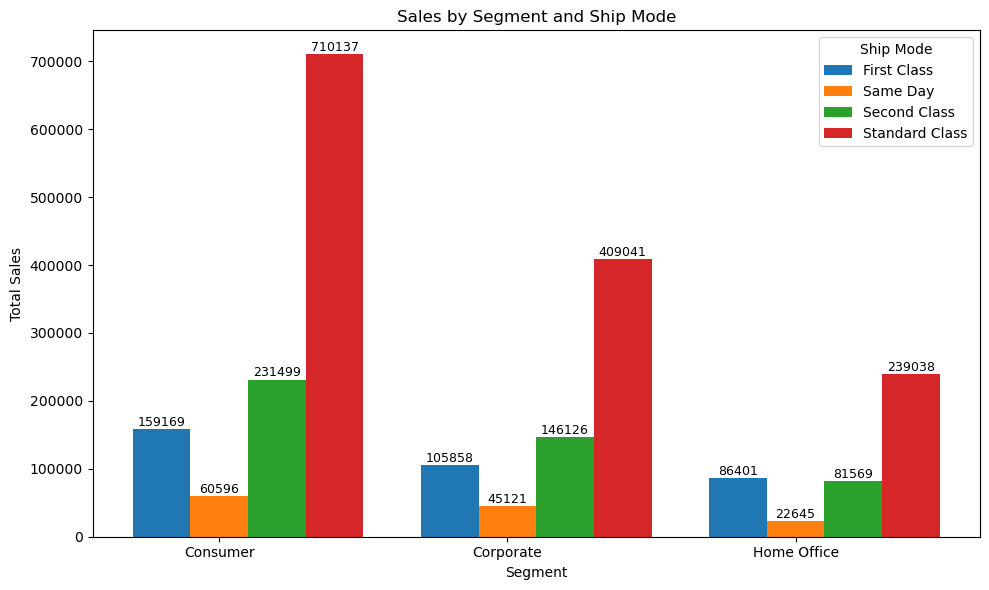

In [136]:

# إنشاء pivot table
pivot_table = df.pivot_table(
    index='Segment',
    columns='Ship Mode',
    values='Sales',
    aggfunc='sum'
)

# إعداد البيانات للرسم
segments = pivot_table.index
ship_modes = pivot_table.columns
bar_width = 0.2
x = np.arange(len(segments))

plt.figure(figsize=(10, 6))

# رسم الأعمدة مع التسمية
for i, mode in enumerate(ship_modes):
    sales = pivot_table[mode]
    positions = x + i * bar_width
    bars = plt.bar(positions, sales, width=bar_width, label=mode)
    
    # إضافة القيم فوق الأعمدة
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{height:.0f}', 
                 ha='center', va='bottom', fontsize=9)

# إعدادات الشكل
plt.title('Sales by Segment and Ship Mode')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(x + bar_width, segments)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()
